# セットアップ
## L1 と同じように Google drive をマウントする。

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## パスの設定

In [5]:
import os, sys
os.environ['ATOMDB'] = "/content/drive/MyDrive/20240823_Kwansei/atomdb/"
sys.path.append('/content/drive/MyDrive/20240823_Kwansei/modules')
os.chdir("/content/drive/MyDrive/20240823_Kwansei/atomdb/")
!ls ${ATOMDB}

100   320		  apec_nei_line.fits	   de421.bsp
200   32-1		  apec_nei.par		   ElectronCloud
210   321		  apec.par		   filemap
21-1  32-2		  APED			   Release_Notes.txt
211   322		  atomdb_examples_2_1.pdf  spectra_2FDC29992CCA2999_2DDA29992CCA2999.pkl
300   apec_coco.fits	  atomdb_examples_2_1.svg  temp-plot.html
310   apec_line.fits	  atomdb_examples_2_2.pdf  userdata
31-1  apec_linelist.fits  atomdb_examples_2_2.svg  VERSION
311   apec_nei_comp.fits  atomdb.tar.gz


## 必要なパッケージのインストール


In [6]:
#!pip install --target /content/drive/MyDrive/20240823_Kwansei/modules pyatomdb
!pip install pyatomdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.0/32.0 MB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 39.6 MB/s eta 0:00:00
  Created wheel for pyatomdb: filename=pyatomdb-0.11.8-cp310-cp310-linux_x86_64.whl size=176564 sha256=ba11ba77be3899fbc9aa52de9cfb3f5956cc27e0f82d1e20189419c1c9debf9e
  Stored in directory: /root/.cache/pip/wheels/1d/69/82/73b7b53c9742c03783c642618ae94e1797756480e047bf2c37
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=24cfbbe94132156d3fa6dae4ad74e456f58628bb3847c6b516e6275fbf1c9d4a
  Stored in directory: /root/

# 電離断面積

In [10]:
import pyatomdb, numpy,os, pylab
try:
  import astropy.io.fits as pyfits
except:
  import pyfits
import plotly.graph_objs as go
import seaborn as sns



# This is a sample routine that reads in the photoionization data
# It also demonstrates using get_data, which should download the data you
# need automagically from the AtomDB site.
#
# It also shows how to get the raw XSTAR PI cross sections.

def plot_cs(Z, z1):
  ## going to get PI cross section from iron 16+ to 17+ (Fe XVII-XVIII)
  #Z = 26
  #z1 = 17

  # get the AtomDB level data
  lvdata = pyatomdb.atomdb.get_data(Z, z1, 'LV')

  # get the XSTAR PI data from AtomDB
  pidata = pyatomdb.atomdb.get_data(Z, z1, 'PI')

  layout = go.Layout()
  fig = go.Figure(layout=layout)
  fig.update_xaxes(title="E (keV)", type="log")
  fig.update_yaxes(title="Cross section (cm$^2$)", type="log")

  # get the ground level (the 0th entry in LV file) data
  lvd = lvdata[1].data[0]

  # To get the raw XSTAR cross sections (units: energy = keV, cross sections = Mb)
  # for level 1 -> 1 (ground to ground)
  pixsec = pyatomdb.atomdb.__sort_pi_data(pidata, 1,1)

  trace = go.Scatter(x=pixsec['energy'], y=pixsec['pi_param']*1e-18, mode='markers+lines')
  fig.add_trace(trace)
  fig.show()

In [ ]:
plot_cs(26, 25)

In [ ]:
plot_cs(26, 24)

In [ ]:
plot_cs(26, 23)

# 再結合率

Force_extrap: False
Force_extrap: False
Press enter to continue
[1.40985184e-14 5.58283897e-14 1.81360584e-13 4.98137350e-13
 1.18656276e-12 2.50400356e-12 4.76631732e-12 8.30868174e-12
 1.34340295e-11 2.03570218e-11 2.91590339e-11 3.97889406e-11
 5.20704080e-11 6.56973667e-11 8.02606892e-11]
Collisional ionization:  [1.40985184e-14 5.58283897e-14 1.81360584e-13 4.98137350e-13
 1.18656276e-12 2.50400356e-12 4.76631732e-12 8.30868174e-12
 1.34340295e-11 2.03570218e-11 2.91590339e-11 3.97889406e-11
 5.20704080e-11 6.56973667e-11 8.02606892e-11]
Excitation Autoionization:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Radiative Recombination:  [1.48091238e-12 1.30417737e-12 1.14693223e-12 1.00716093e-12
 8.83049616e-13 7.72966346e-13 6.75442886e-13 5.89158249e-13
 5.12923878e-13 4.45670309e-13 3.86435192e-13 3.34352533e-13
 2.88643046e-13 2.48605517e-13 2.13609072e-13]
Dielectroni Recombination:  [6.62908184e-14 1.42254784e-13 2.64750527e-13 4.35026767e-13
 6.41607315e-13 8.62088474e-13 

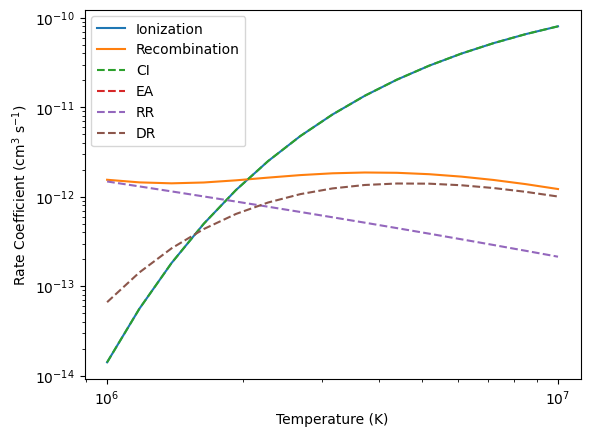

In [ ]:
import pyatomdb, numpy, pylab

# We will get some maxwellian rates for a O 6+ 7->1

Z = 8
z1 = 7
up = 7
lo = 1

# excitation

Te = numpy.logspace(6, 7, 15)

#  >>> # (1) Get excitation rates for row 12 of an Fe XVII file
#  >>> colldata = pyatomdb.atomdb.get_data(26,17,'EC')
#  >>> exc, dex = get_maxwell_rate(Te, colldata=colldata, index=12)

#  >>> # (2) Get excitation rates for row 12 of an Fe XVII file
#  >>> exc, dex = get_maxwell_rate(Te, Z=26,z1=17, index=12)

#  >>>  (3) Get excitation rates for transitions from level 1 to 15 of FE XVII
#  >>> exc, dex = get_maxwell_rate(Te, Z=26, z1=17, dtype='EC', finallev=15, initlev=1)

datacache = {}

# get data by specifying ion, upper and lower levels
exc, dexc = pyatomdb.atomdb.get_maxwell_rate(Te, Z=Z, z1=z1, initlev = lo, finallev=up, dtype='EC', datacache=datacache)

fig= pylab.figure()
fig.show()
ax = fig.add_subplot(111)
ax.loglog(Te, exc, label='excitation')
ax.loglog(Te, dexc, label = 'deexcitation')


# preload data and find a specific transition
ecdat = pyatomdb.atomdb.get_data(8,7,'EC', datacache=datacache)

i = numpy.where( (ecdat[1].data['Upper_Lev']==up) &\
                 (ecdat[1].data['Lower_Lev']==lo))[0][0]

exc, dex = pyatomdb.atomdb.get_maxwell_rate(Te,colldata=ecdat, index=i, datacache=datacache)

ax.loglog(Te, exc, 'o', label='excitation')
ax.loglog(Te, dexc, 'o', label = 'deexcitation')

ax.legend(loc=0)
ax.set_xlabel("Temperature (K)")
ax.set_ylabel("Rate Coefficient (cm$^3$ s$^{-1}$)")

pylab.draw()
zzz=input("Press enter to continue")
# save image files
fig.savefig('atomdb_examples_2_1.pdf')
fig.savefig('atomdb_examples_2_1.svg')

# you can also obtain ionization or recombination rates (see get_maxwell_rates writeup for options)
# in most cases you need to specify initlev and finallev as 1 to get the ion to ion rates.

ion= pyatomdb.atomdb.get_maxwell_rate(Te,Z=Z, z1=z1, initlev=1, finallev=1, dtype='CI', datacache=datacache)
print(ion)
#
# However it is recommended that you use get_ionrec_rate instead - it gives you everythign in one go

# combining the different types
ion, rec = pyatomdb.atomdb.get_ionrec_rate(Te, Z=Z, z1=z1, datacache=datacache)

# as separate entities
CI, EA, RR, DR=pyatomdb.atomdb.get_ionrec_rate(Te, Z=Z, z1=z1, datacache=datacache, separate=True)

print("Collisional ionization: ",CI)
print("Excitation Autoionization: ",EA)
print("Radiative Recombination: ",RR)
print("Dielectroni Recombination: ",DR)
ax.cla()

ax.loglog(Te, ion, label='Ionization')
ax.loglog(Te, rec, label='Recombination')

ax.loglog(Te, CI, '--',label='CI')
ax.loglog(Te, EA, '--',label='EA')
ax.loglog(Te, RR, '--',label='RR')
ax.loglog(Te, DR, '--',label='DR')

ax.legend(loc=0)
ax.set_xlabel("Temperature (K)")
ax.set_ylabel("Rate Coefficient (cm$^3$ s$^{-1}$)")

pylab.draw()
zzz=input("Press enter to continue")
# save image files
fig.savefig('atomdb_examples_2_2.pdf')
fig.savefig('atomdb_examples_2_2.svg')


#get_maxwell_rate(Te, colldata=False, index=-1, lvdata=False, Te_unit='K', \
#                     lvdatap1=False, ionpot = False, \
#                     force_extrap=False, silent=True,\
#                     finallev=False, initlev=False,\
#                     Z=-1, z1=-1, dtype=False, exconly=False,\
#                     datacache=False, settings=False, ladat=False):

# Einstein係数


In [11]:
import pyatomdb, numpy, pylab
import pandas as pd

# physical constants
from scipy import constants
h = constants.h
c = constants.c
e = constants.e
keV_A = h*c/e*1e7
def get_trans(Z, C):

    # Get LA data.
    trans = pyatomdb.atomdb.get_data(Z, C, 'LA')
    if (trans is False or len(trans) == 0):
        print("Data unavailable for Z={} and C={}.".format(Z, C))
        return None
        #sys.exit(1)
    data = None
    columns = ['UPPER_LEV', 'LOWER_LEV', 'WAVELEN', 'EINSTEIN_A']
    for column in columns:
        datum = pd.DataFrame(trans[1].data[column].byteswap().newbyteorder(), columns=[column])
        if (data is None):
            data = datum
        else:
            data = pd.concat([data, datum], axis=1)
    data['ENERGY'] = keV_A/data['WAVELEN']
    data = data.sort_values('EINSTEIN_A', ascending=False) #.head(args.trans_max[0]) This is not working now.

    return data


In [17]:
def plot_A(Z, C):

  levels = get_trans(Z, C)
  if (levels is not None):
    levels_RoI = levels[levels.LOWER_LEV==1].sort_values("EINSTEIN_A", ascending=False).head(1)
    display(levels_RoI)

    layout = go.Layout()
    fig = go.Figure(layout=layout)
    fig.update_xaxes(title="E (keV)", type="linear")
    fig.update_yaxes(title="A coefficients (s$^{-1}$)", type="log")

    trace = go.Scatter(x=levels_RoI['ENERGY'], y=levels_RoI['EINSTEIN_A'], mode='markers')
    fig.add_trace(trace)
#    fig.show()

In [21]:
for z in range(1,30):
  print(z)
  plot_A(z, z)

1


UPPER_LEV  LOWER_LEV      WAVELEN   EINSTEIN_A    ENERGY
2          4          1  1215.668701  626808192.0  0.010199

2


UPPER_LEV  LOWER_LEV     WAVELEN    EINSTEIN_A    ENERGY
2          4          1  303.780548  1.002936e+10  0.040814

3


UPPER_LEV  LOWER_LEV     WAVELEN    EINSTEIN_A    ENERGY
2          4          1  134.995819  5.077502e+10  0.091843

4


UPPER_LEV  LOWER_LEV    WAVELEN    EINSTEIN_A    ENERGY
2          4          1  75.925972  1.604802e+11  0.163296

5


UPPER_LEV  LOWER_LEV    WAVELEN    EINSTEIN_A    ENERGY
2          4          1  48.585526  3.918159e+11  0.255188

6


UPPER_LEV  LOWER_LEV    WAVELEN    EINSTEIN_A    ENERGY
2          4          1  33.734188  8.125247e+11  0.367533

7


UPPER_LEV  LOWER_LEV    WAVELEN    EINSTEIN_A    ENERGY
2          4          1  24.779215  1.505460e+12  0.500356

8


UPPER_LEV  LOWER_LEV    WAVELEN    EINSTEIN_A   ENERGY
3          4          1  18.967119  2.568522e+12  0.65368

9


UPPER_LEV  LOWER_LEV    WAVELEN    EINSTEIN_A    ENERGY
3          4          1  14.982341  4.114790e+12  0.827536

10


UPPER_LEV  LOWER_LEV    WAVELEN    EINSTEIN_A    ENERGY
3          4          1  12.132091  6.272479e+12  1.021952

11


UPPER_LEV  LOWER_LEV    WAVELEN    EINSTEIN_A    ENERGY
3          4          1  10.023192  9.184288e+12  1.236973

12


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A    ENERGY
3          4          1  8.419202  1.301011e+13  1.472636

13


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A    ENERGY
3          4          1  7.170909  1.792349e+13  1.728988

14


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A    ENERGY
3          4          1  6.180419  2.411350e+13  2.006081

15


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A    ENERGY
3          4          1  5.381345  3.178508e+13  2.303963

16


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A    ENERGY
3          4          1  4.727354  4.115808e+13  2.622698

17


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A    ENERGY
3          4          1  4.185331  5.246849e+13  2.962351

18


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A    ENERGY
3          4          1  3.731103  6.596759e+13  3.322991

19


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A    ENERGY
3          4          1  3.346692  8.192144e+13  3.704679

20


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A    ENERGY
3          4          1  3.018481  1.006134e+14  4.107502

21


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A    ENERGY
3          4          1  2.736024  1.223425e+14  4.531547

22


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A    ENERGY
3          4          1  2.491199  1.474223e+14  4.976889

23


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A    ENERGY
3          4          1  2.277604  1.761850e+14  5.443624

24


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A    ENERGY
3          4          1  2.090145  2.089571e+14  5.931848

25


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A    ENERGY
3          4          1  1.924724  2.461314e+14  6.441662

26


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A    ENERGY
2          4          1  1.778017  2.880743e+14  6.973171

27
Data unavailable for Z=27 and C=27.
28


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A    ENERGY
3          4          1  1.530341  3.878645e+14  8.101738

29


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A    ENERGY
2          4          1  1.424648  4.392189e+14  8.702794

In [20]:
for z in range(1,30):
  print(z)
  plot_A(z, z-1)

1
Data unavailable for Z=1 and C=0.
2


UPPER_LEV  LOWER_LEV     WAVELEN    EINSTEIN_A    ENERGY
0          5          1  584.314087  1.621479e+09  0.021219

3
Data unavailable for Z=3 and C=2.
4
Data unavailable for Z=4 and C=3.
5
Data unavailable for Z=5 and C=4.
6


UPPER_LEV  LOWER_LEV    WAVELEN    EINSTEIN_A    ENERGY
10          7          1  40.267834  9.340000e+11  0.307899

7


UPPER_LEV  LOWER_LEV    WAVELEN    EINSTEIN_A    ENERGY
12          7          1  28.787012  1.890000e+12  0.430695

8


UPPER_LEV  LOWER_LEV    WAVELEN    EINSTEIN_A    ENERGY
12          7          1  21.602011  3.430000e+12  0.573947

9


UPPER_LEV  LOWER_LEV    WAVELEN    EINSTEIN_A    ENERGY
12          7          1  16.807013  5.770000e+12  0.737693

10


UPPER_LEV  LOWER_LEV    WAVELEN    EINSTEIN_A    ENERGY
12          7          1  13.447083  9.120000e+12  0.922015

11


UPPER_LEV  LOWER_LEV    WAVELEN    EINSTEIN_A    ENERGY
12          7          1  11.002636  1.380000e+13  1.126859

12


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A    ENERGY
12          7          1  9.168754  2.000000e+13  1.352247

13


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A   ENERGY
12          7          1  7.757305  2.810000e+13  1.59829

14


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A    ENERGY
12          7          1  6.648037  3.840000e+13  1.864974

15


UPPER_LEV  LOWER_LEV  WAVELEN    EINSTEIN_A    ENERGY
12          7          1  5.76019  5.120000e+13  2.152432

16


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A    ENERGY
12          7          1  5.038729  6.700000e+13  2.460624

17


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A    ENERGY
12          7          1  4.444312  8.610000e+13  2.789727

18


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A    ENERGY
12          7          1  3.949068  1.090000e+14  3.139581

19


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A    ENERGY
13          7          1  3.531803  1.360000e+14  3.510507

20


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A    ENERGY
13          7          1  3.177246  1.670000e+14  3.902253

21


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A    ENERGY
13          7          1  2.873152  2.030000e+14  4.315268

22


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A    ENERGY
13          7          1  2.610399  2.440000e+14  4.749627

23


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A   ENERGY
13          7          1  2.381953  2.910000e+14  5.20515

24


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A    ENERGY
13          7          1  2.182034  3.430000e+14  5.682048

25


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A    ENERGY
13          7          1  2.006074  4.020000e+14  6.180439

26


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A    ENERGY
13          7          1  1.850397  4.670000e+14  6.700411

27
Data unavailable for Z=27 and C=26.
28


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A    ENERGY
13          7          1  1.588404  6.170000e+14  7.805582

29


UPPER_LEV  LOWER_LEV   WAVELEN    EINSTEIN_A    ENERGY
1195          7          1  1.475013  7.030000e+14  8.405633